In [1]:
#Importing libraries and dependencies
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import pearsonr
import scipy.stats as stat
from scipy.stats import yeojohnson

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

from sklearn.metrics import mean_squared_error, r2_score


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing the dataset
housingDf = pd.read_csv('train.csv')
housingDf.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,5,1976,1976,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,120,Unf,0,958,1078,GasA,TA,Y,SBrkr,958,0,0,958,0,0,2,0,2,1,TA,5,Typ,1,TA,Attchd,1977.0,RFn,2,440,TA,TA,Y,0,205,0,0,0,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,8,6,1970,1970,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,PConc,TA,Gd,Gd,ALQ,351,Rec,823,1043,2217,GasA,Ex,Y,SBrkr,2217,0,0,2217,1,0,2,0,4,1,Gd,8,Typ,1,TA,Attchd,1970.0,Unf,2,621,TA,TA,Y,81,207,0,0,224,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,862,Unf,0,255,1117,GasA,Ex,Y,SBrkr,1127,886,0,2013,1,0,2,1,3,1,TA,8,Typ,1,TA,Attchd,1997.0,Unf,2,455,TA,TA,Y,180,130,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1977,1977,Hip,CompShg,Plywood,Plywood,BrkFace,480.0,TA,TA,CBlock,Gd,TA,No,BLQ,705,Unf,0,1139,1844,GasA,Ex,Y,SBrkr,1844,0,0,1844,0,0,2,0,3,1,TA,7,Typ,1,TA,Attchd,1977.0,RFn,2,546,TA,TA,Y,0,122,0,0,0,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,1977,2000,Gable,CompShg,CemntBd,CmentBd,Stone,126.0,Gd,TA,CBlock,Gd,TA,No,ALQ,1246,Unf,0,356,1602,GasA,Gd,Y,SBrkr,1602,0,0,1602,0,1,2,0,3,1,Gd,8,Typ,1,TA,Attchd,1977.0,Fin,2,529,TA,TA,Y,240,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


In [3]:
#Checking dataset dimensions
housingDf.shape

(1168, 81)

In [4]:
#Checking for missing values
housingDf.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       214
LotArea             0
Street              0
Alley            1091
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          7
MasVnrArea          7
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           30
BsmtCond           30
BsmtExposure       31
BsmtFinType1       30
BsmtFinSF1          0
BsmtFinType2       31
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [5]:
#dropping 'Alley', 'PoolQC' and 'MiscFeature' as they have majority of the data missing
housingDf.drop(['Alley', 'PoolQC', 'MiscFeature', 'Fence'], axis = 1, inplace=True)

In [6]:
# Making a list of numeric columns
numericCols = [i for i in housingDf.columns if housingDf[i].dtypes in ['int64', 'float64']]
len(numericCols)

38

In [7]:
# Making a list of Categorical Columns
categoricalCols = [i for i in housingDf.columns if i not in numericCols]
len(categoricalCols)

39

In [8]:
#Making a list of columns with missing values
missingCols = [i for i in housingDf.columns if housingDf[i].isnull().sum() >=1]
missingCols

['LotFrontage',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [9]:
#Defining a function for handling missing values in the numerics columns.
#We will use random number imputation technique which replaces the missing values with a value sampled from the column itself.
#This technique ensures that the vairance of the column remains intact.
def nanNumericImputer(variable, df=housingDf):
    df[variable+"_random"]=df[variable]
    ##It will have the random sample to fill the na
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    ##pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [10]:
#Applying the function above to all numeric columns
for cols in missingCols:
    if cols in numericCols:
        nanNumericImputer(cols)

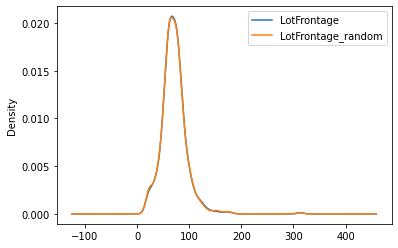

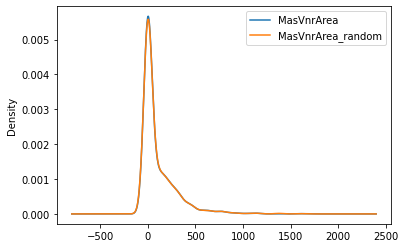

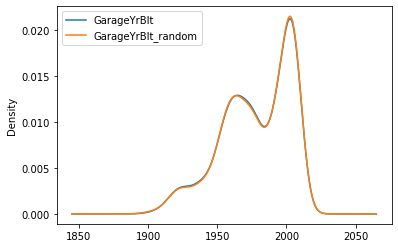

In [11]:
#Plotting all numeric columns after missing values were imputed.
#As evident, the original distribution of the columns are preserved after the missing values were imputed
for cols in [i for i in missingCols if i in numericCols]:
    housingDf[[cols, f'{cols}_random']].plot(kind='kde')
    plt.show()

In [12]:
#Since we have made a new imputed columns for the columns with missing values and the imputed columns have similar distribution
# the original column, we will delete the oridinal columns
housingDf.drop([i for i in missingCols if i in numericCols], axis=1, inplace=True)
for cols in missingCols:
    if cols in numericCols:
        numericCols.remove(cols)

In [13]:
#Handling missing values in the categorical columns
#In order to do so, we will replace the missing values with the mode of the column
for cols in missingCols:
    if cols in categoricalCols:
        housingDf[cols].fillna(housingDf[cols].mode()[0], inplace=True)

In [14]:
#Checking the data types of all the columns
housingDf.dtypes

Id                      int64
MSSubClass              int64
MSZoning               object
LotArea                 int64
Street                 object
LotShape               object
LandContour            object
Utilities              object
LotConfig              object
LandSlope              object
Neighborhood           object
Condition1             object
Condition2             object
BldgType               object
HouseStyle             object
OverallQual             int64
OverallCond             int64
YearBuilt               int64
YearRemodAdd            int64
RoofStyle              object
RoofMatl               object
Exterior1st            object
Exterior2nd            object
MasVnrType             object
ExterQual              object
ExterCond              object
Foundation             object
BsmtQual               object
BsmtCond               object
BsmtExposure           object
BsmtFinType1           object
BsmtFinSF1              int64
BsmtFinType2           object
BsmtFinSF2

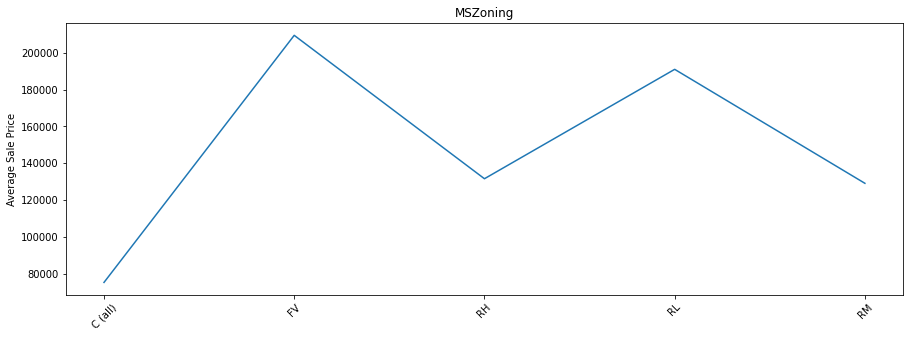

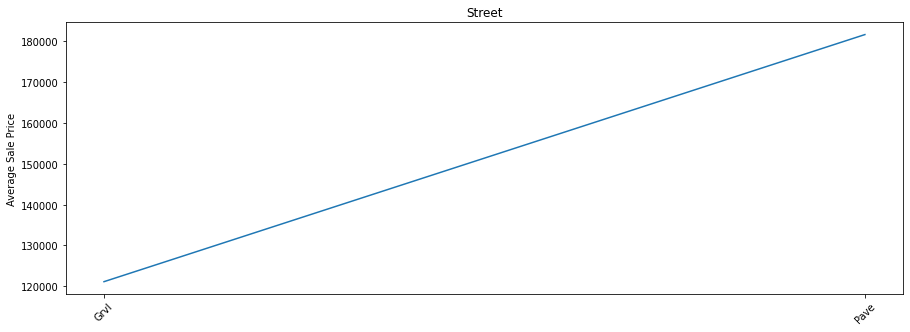

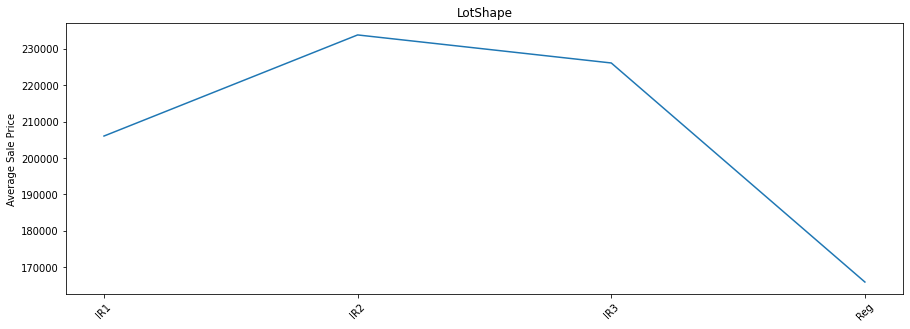

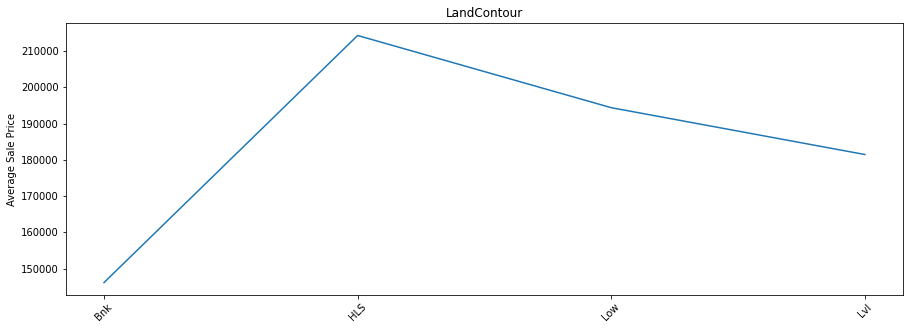

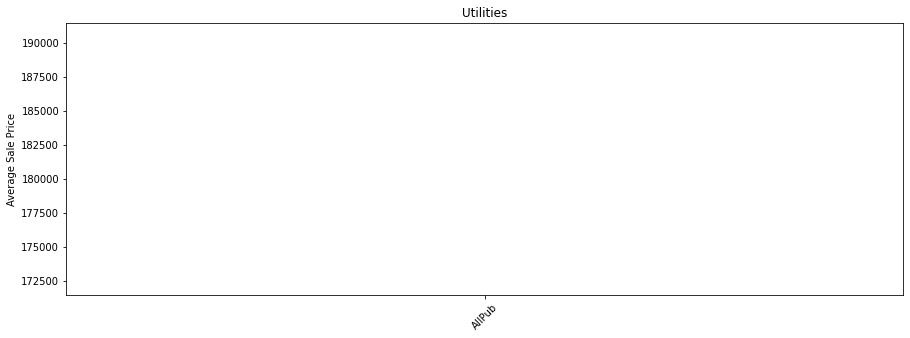

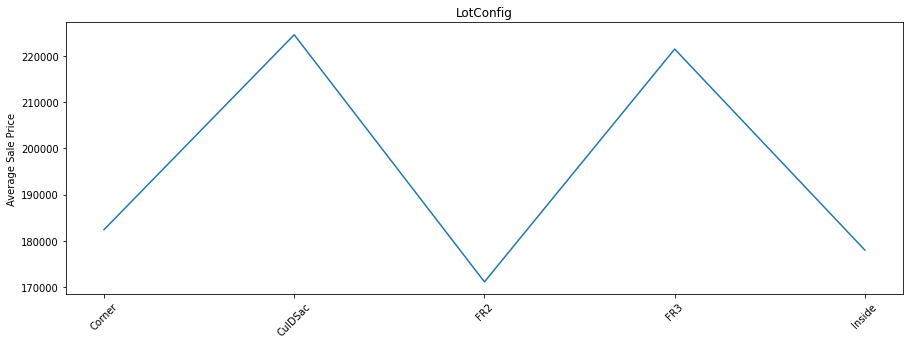

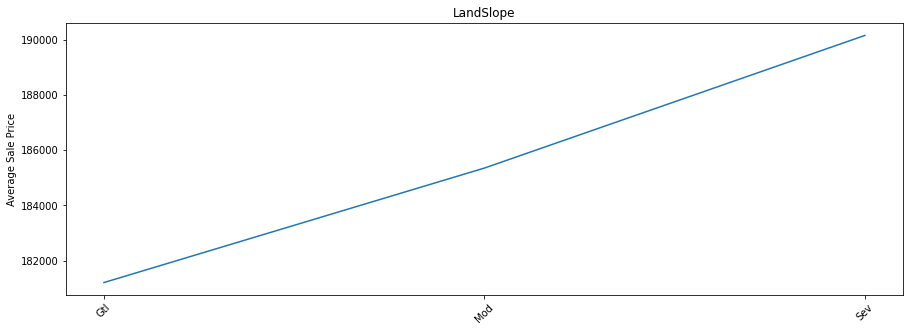

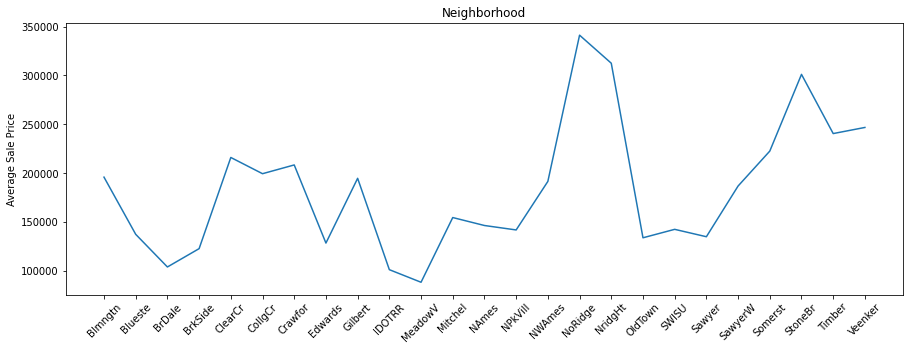

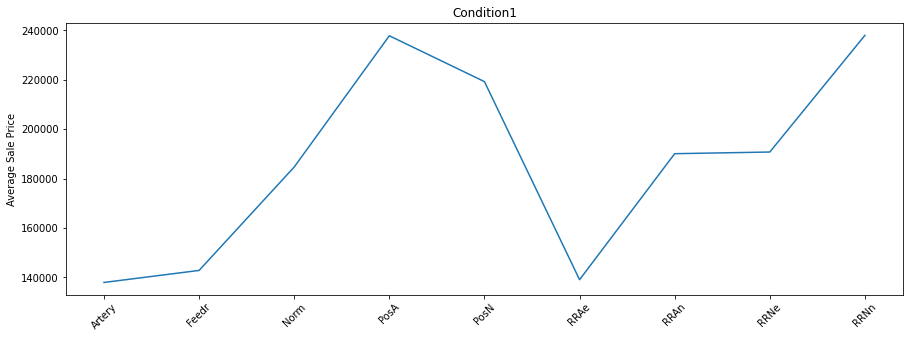

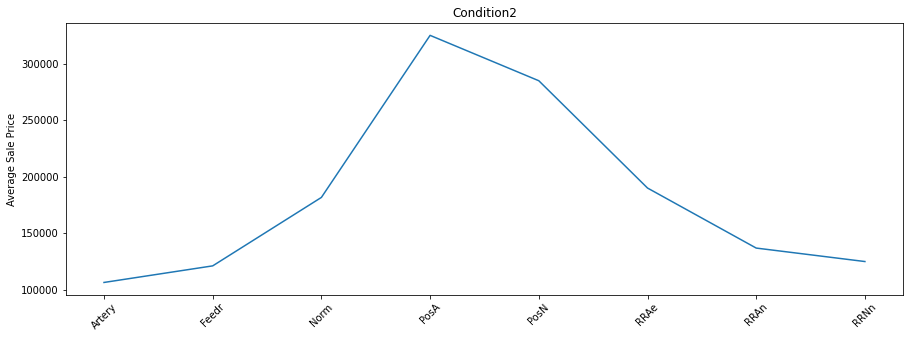

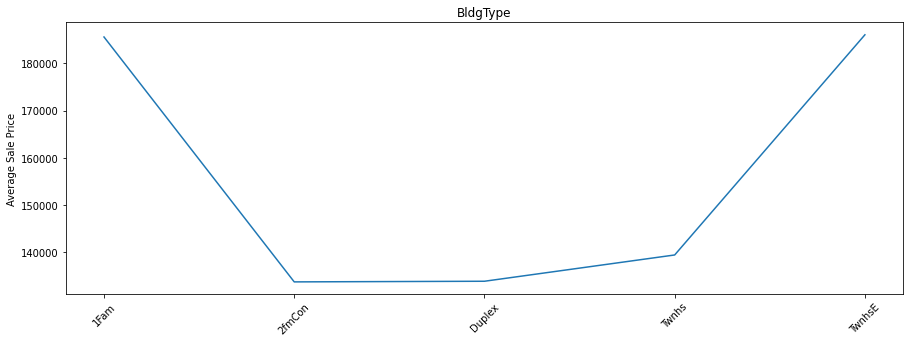

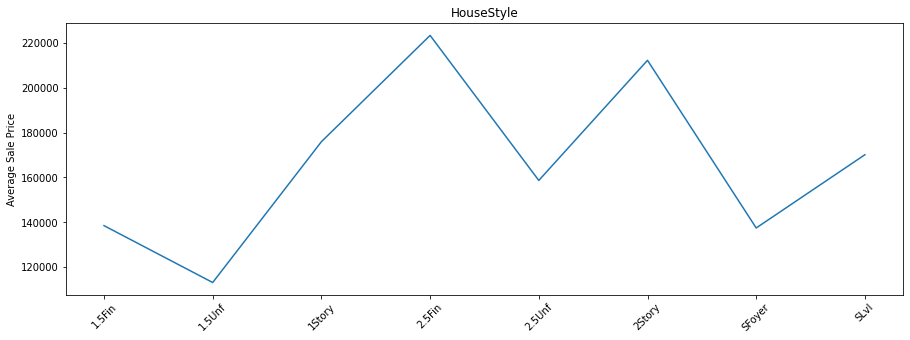

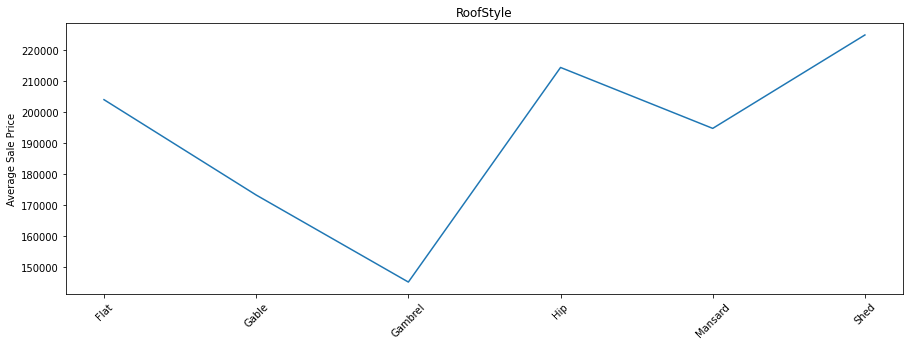

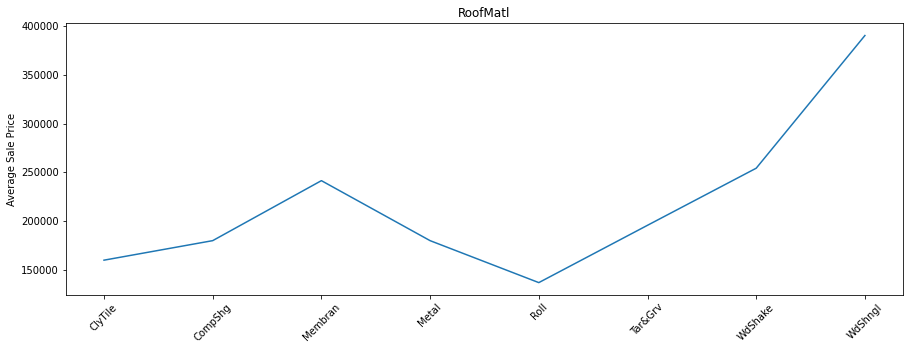

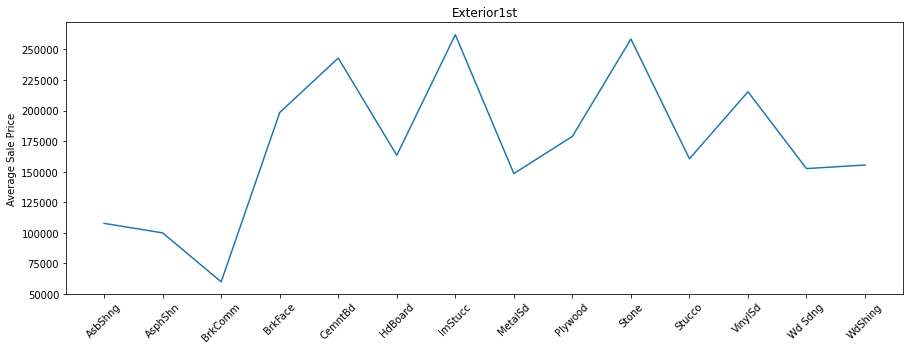

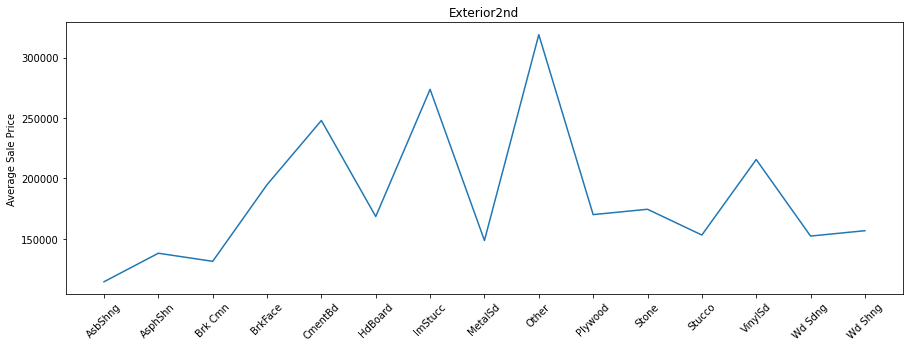

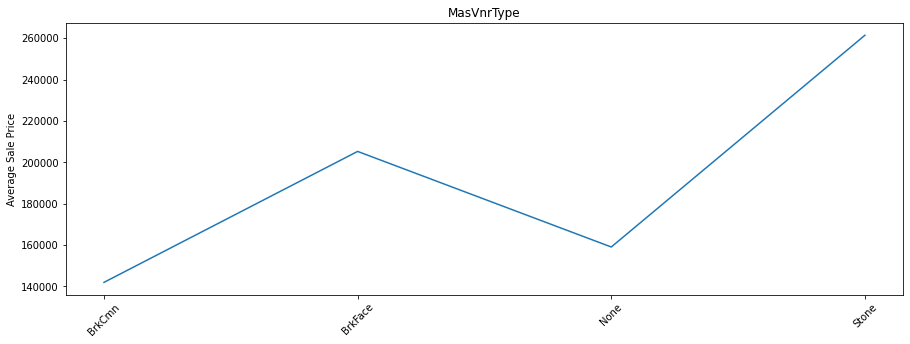

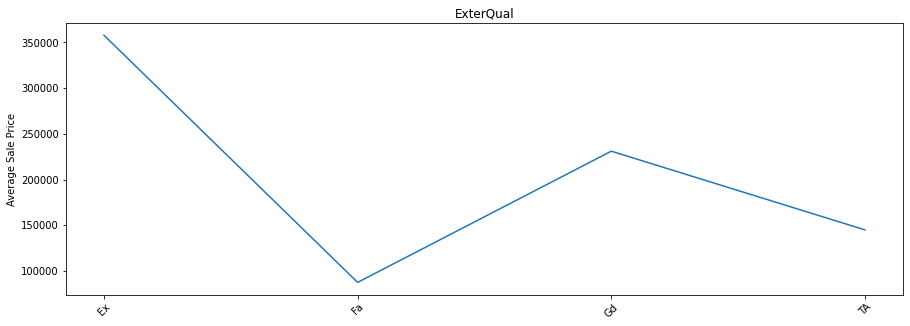

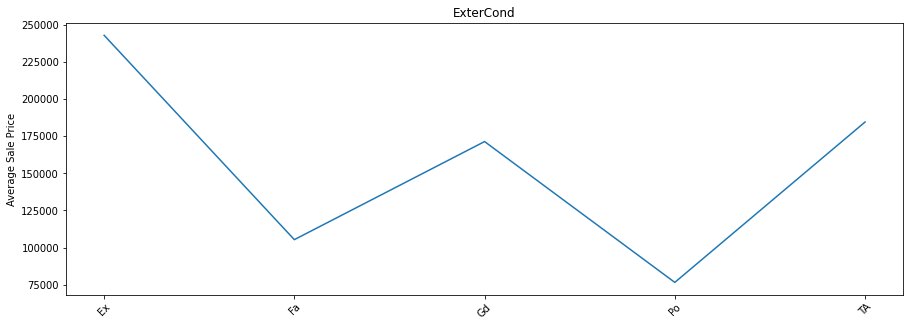

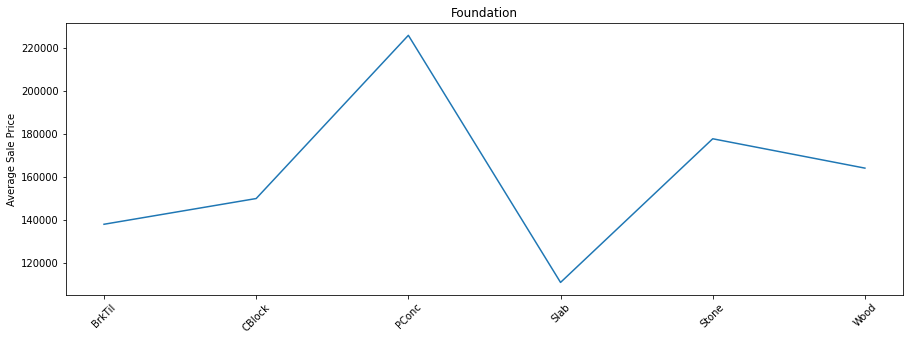

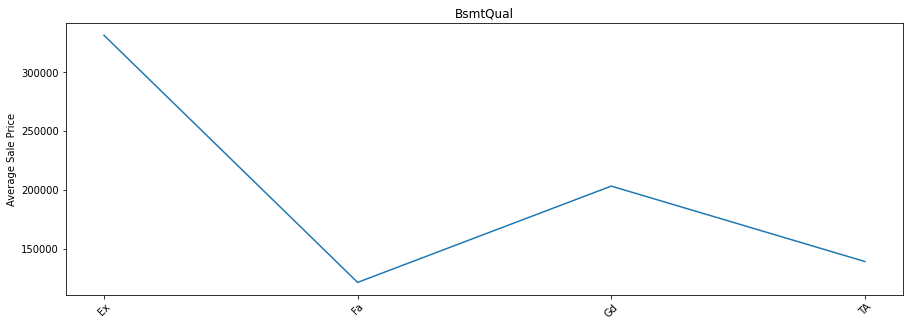

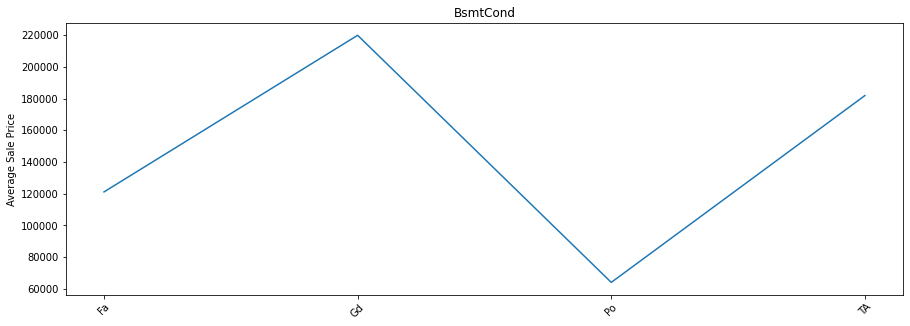

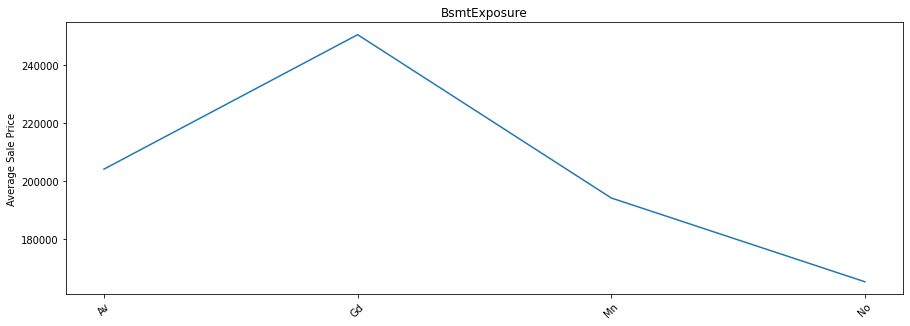

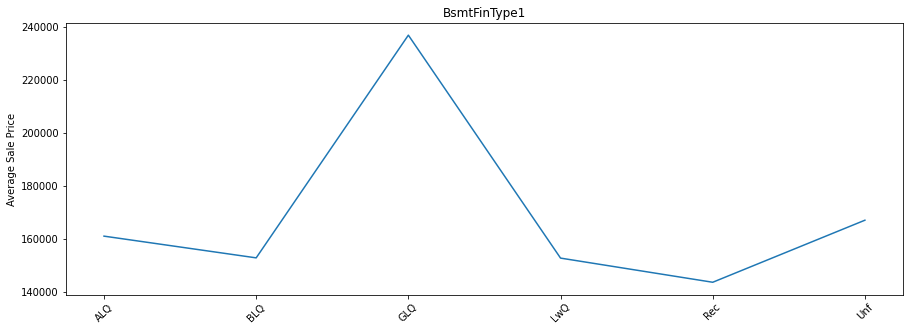

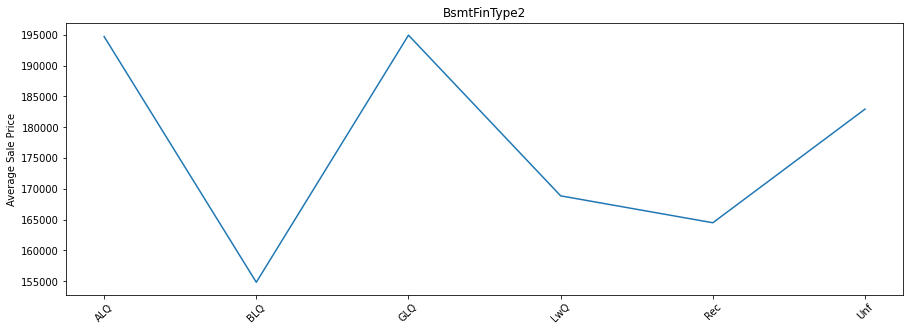

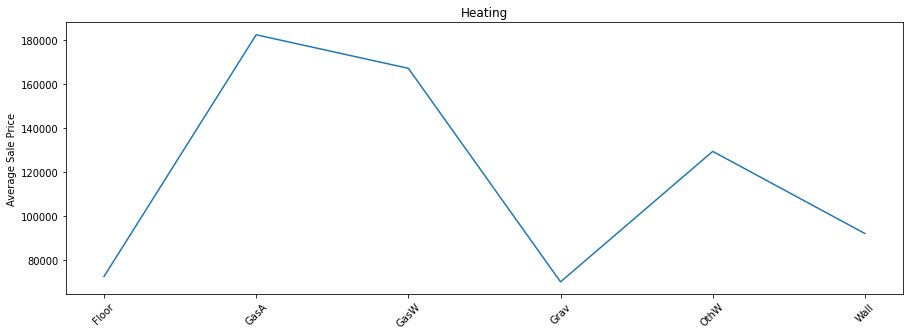

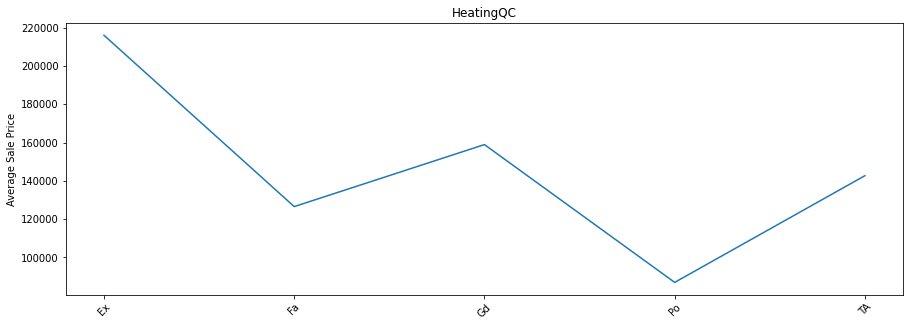

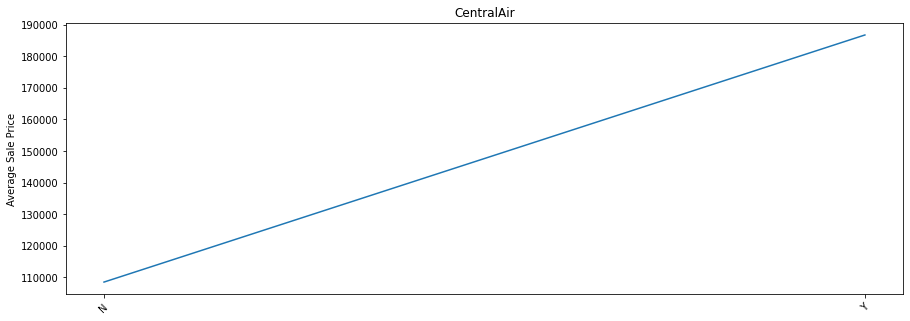

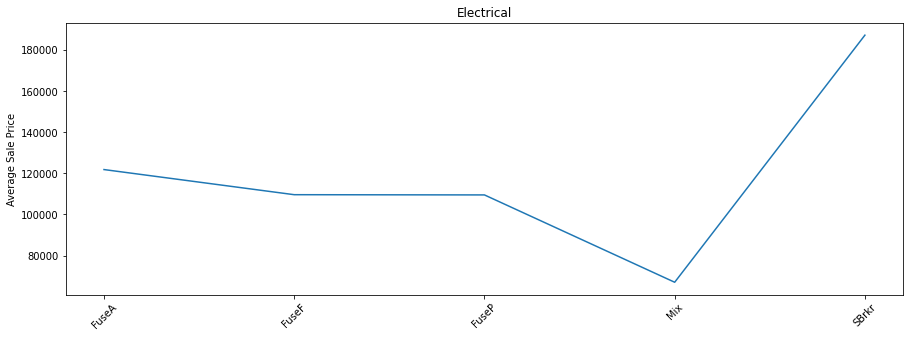

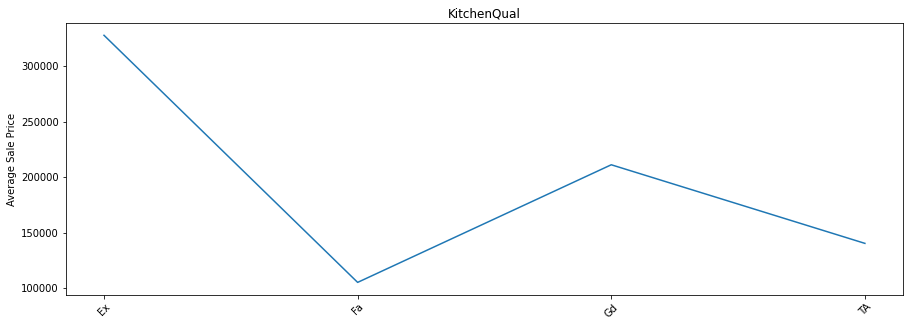

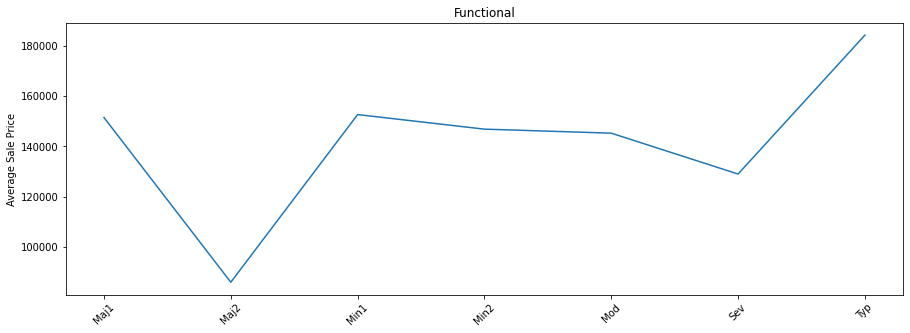

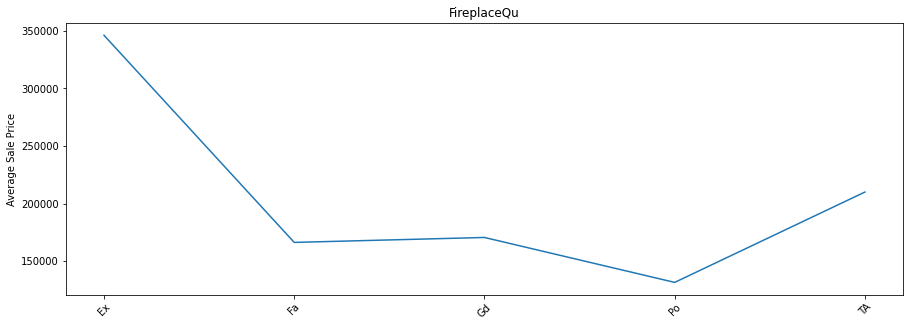

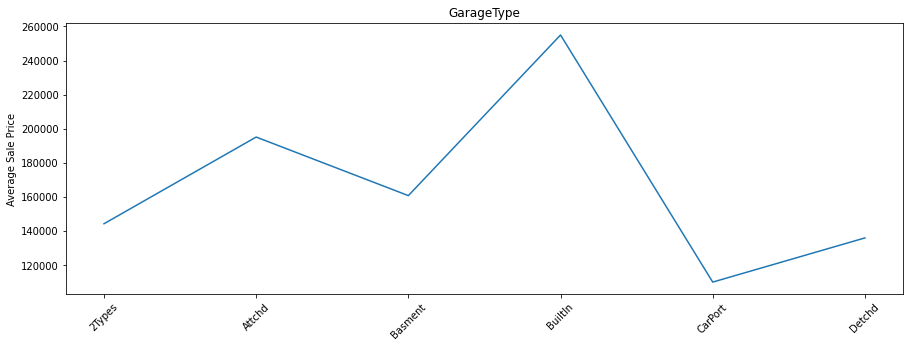

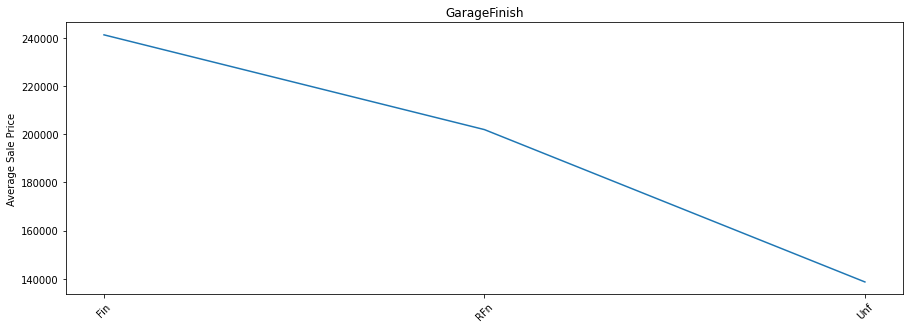

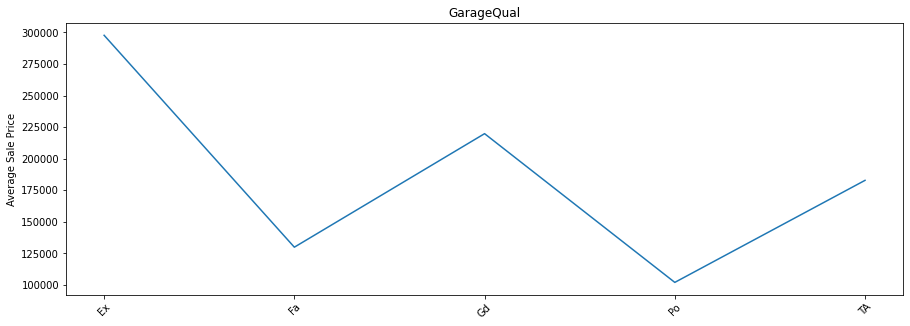

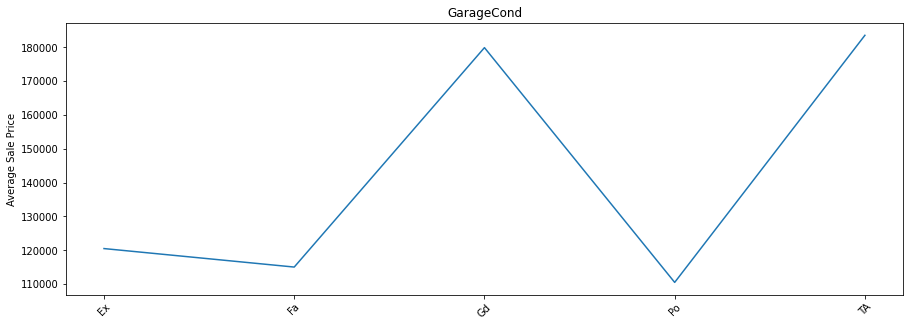

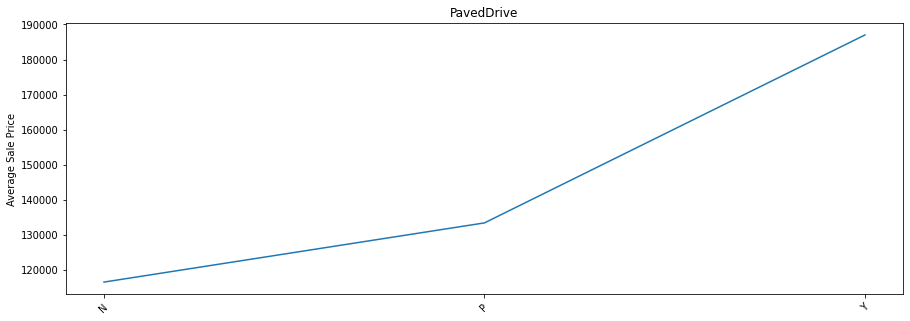

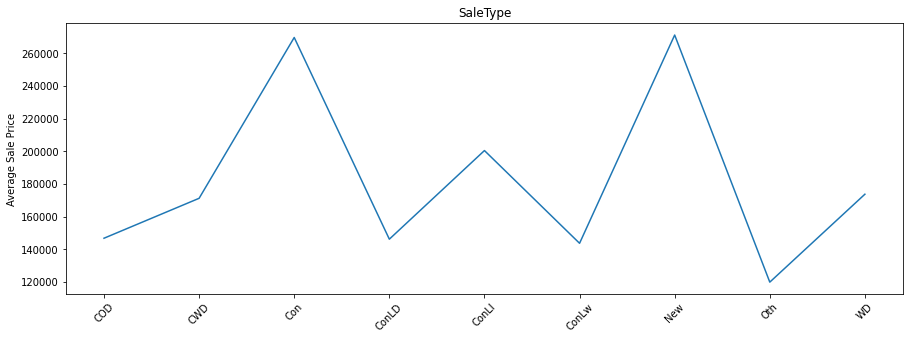

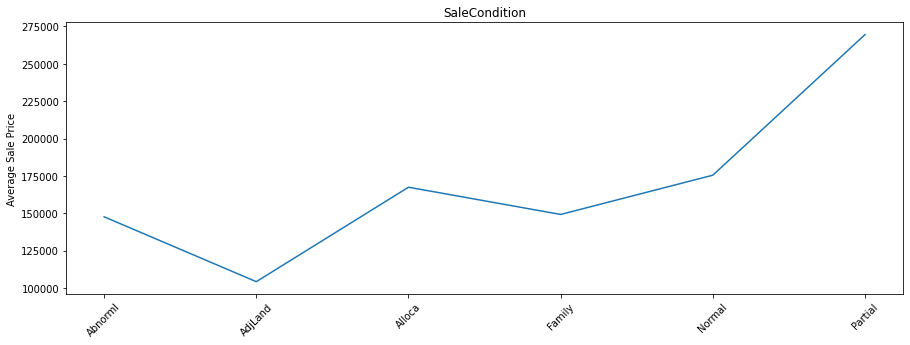

In [15]:
#Checking the mean Sale price with respect to the categorical columns
for cols in categoricalCols:
    plt.figure(figsize=(15,5))
    plt.plot(housingDf.groupby(cols)['SalePrice'].mean())
    plt.title(cols)
    plt.ylabel('Average Sale Price')
    plt.xticks(rotation=45)
    plt.show()

In [16]:
#Running pearson correlation test to find numerical columns to find columns with significant statistical relation with the target column.
#Making an empty list to store all columns with p-value less the 0.05
significantCols = list()

#Calculating the pearson correlation cofficient and their p-values with respect to the target variable to see if they are
#statistically significant. If they are significant then we print those column's Pearson Correlation Coefficient and P-value
#and store the column names in the empty list initialised above
for index in range(len(numericCols)):
    pCoef, pVal = pearsonr(housingDf[numericCols[index]], housingDf['SalePrice'])
    if pVal < 0.05:
        significantCols.append(numericCols[index])
        print(f'{numericCols[index]}:\n\tThe Pearson Correlation Coefficient:{pCoef}\n\tP-value: {pVal}')

MSSubClass:
	The Pearson Correlation Coefficient:-0.06077481174698905
	P-value: 0.03782586041257893
LotArea:
	The Pearson Correlation Coefficient:0.2494985575516927
	P-value: 4.930470127943279e-18
OverallQual:
	The Pearson Correlation Coefficient:0.7891854326077523
	P-value: 4.010743144038442e-249
OverallCond:
	The Pearson Correlation Coefficient:-0.06564233066557873
	P-value: 0.0248703176684216
YearBuilt:
	The Pearson Correlation Coefficient:0.5144075581459776
	P-value: 6.826930778737164e-80
YearRemodAdd:
	The Pearson Correlation Coefficient:0.5078305923369402
	P-value: 1.3933908564633205e-77
BsmtFinSF1:
	The Pearson Correlation Coefficient:0.3628743616872132
	P-value: 1.1410107510519797e-37
BsmtUnfSF:
	The Pearson Correlation Coefficient:0.21572414208173143
	P-value: 9.150714546793853e-14
TotalBsmtSF:
	The Pearson Correlation Coefficient:0.5950418180412795
	P-value: 8.502120557192491e-113
1stFlrSF:
	The Pearson Correlation Coefficient:0.5876422777362369
	P-value: 2.1993765353402793e-

In [17]:
significantCols

['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MoSold',
 'SalePrice']

<AxesSubplot:>

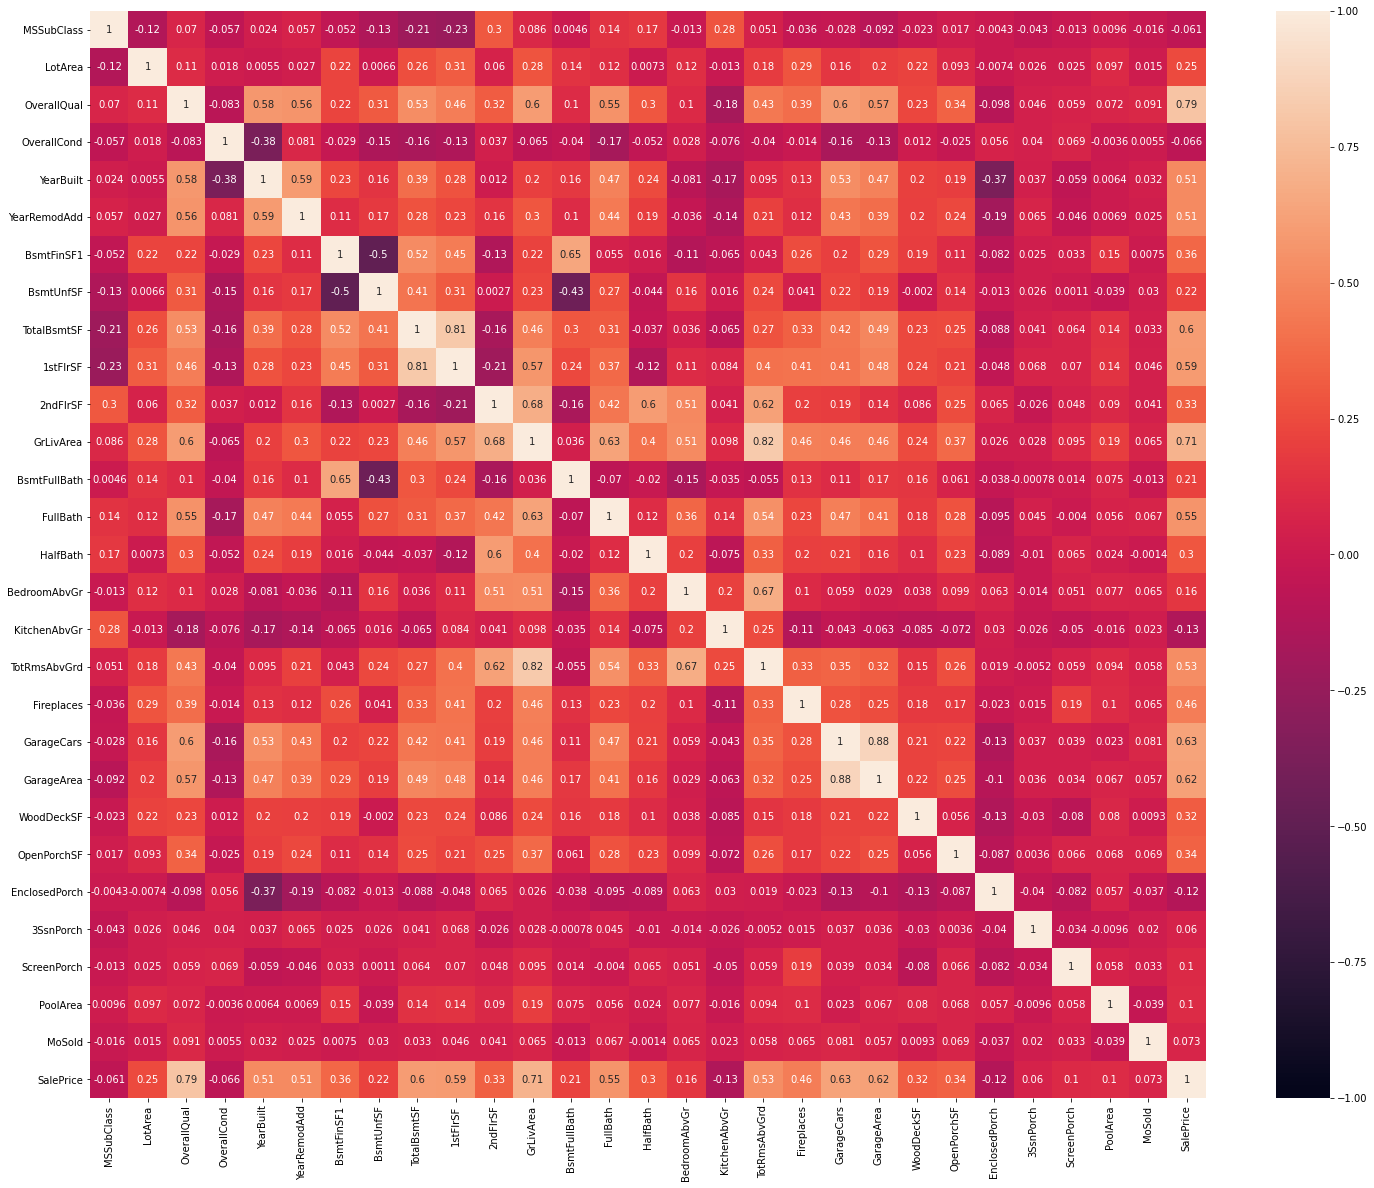

In [18]:
#Checking the Pearson Correlation Cofficient with the help of heatmap in order to check for multicollinearity
plt.figure(figsize=(25,20))
sns.heatmap(housingDf[significantCols].corr(), vmax = 1, vmin = -1, annot = True)

In [19]:
#Defining a function to perform Chi-square test to see if the categorical columns have any statistically significant relation with the target column
def chi2IndependenceTest(categoricalColName):
    
    crossTab = pd.crosstab(housingDf[categoricalColName], housingDf['SalePrice'], margins=True, margins_name='Total')
    observedVal = crossTab.values
    expectedVal = stat.chi2_contingency(crossTab)[3]
    rowNum = (crossTab.shape[0] - 1)
    columnNum = (crossTab.shape[1] - 1)
    doF=(rowNum-1)*(columnNum-1)
    chiSquare=sum([(o-e)**2./e for o,e in zip(observedVal, expectedVal)])
    chiSquareStatistic=chiSquare[0]+chiSquare[1]
    pValue=1-stat.chi2.cdf(x=chiSquareStatistic,df=doF)
    
    return doF, pValue

In [20]:
#Running the function above on all the categorical columns
#From the test we see that none of the categorical columns have any significant relation with the target column and can be ignored.
sigCatCols = list()

for i in categoricalCols:
    d, p = chi2IndependenceTest(i)
    if p<=0.05:
        print(f'{i} has statistically significant relation with SalePrice')
        sigCatCols.append(i)
    else:
        print(f'{i} has no statistically significant relation with SalePrice')

MSZoning has no statistically significant relation with SalePrice
Street has no statistically significant relation with SalePrice
LotShape has no statistically significant relation with SalePrice
LandContour has no statistically significant relation with SalePrice
Utilities has no statistically significant relation with SalePrice
LotConfig has no statistically significant relation with SalePrice
LandSlope has no statistically significant relation with SalePrice
Neighborhood has no statistically significant relation with SalePrice
Condition1 has no statistically significant relation with SalePrice
Condition2 has no statistically significant relation with SalePrice
BldgType has no statistically significant relation with SalePrice
HouseStyle has no statistically significant relation with SalePrice
RoofStyle has no statistically significant relation with SalePrice
RoofMatl has no statistically significant relation with SalePrice
Exterior1st has no statistically significant relation with Sa

In [21]:
#List of columns with skewness more the 0.5 or less then -0.5
skewedCols = [significantCols[i] for i in range(0, len(significantCols)) if housingDf[significantCols[i]].skew() > 0.5 or housingDf[significantCols[i]].skew() < -0.5]
skewedCols

['MSSubClass',
 'LotArea',
 'OverallCond',
 'YearBuilt',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'HalfBath',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'SalePrice']

In [22]:
housingDf[skewedCols].skew()

MSSubClass        1.422019
LotArea          10.659285
OverallCond       0.580714
YearBuilt        -0.579204
BsmtFinSF1        1.871606
BsmtUnfSF         0.909057
TotalBsmtSF       1.744591
1stFlrSF          1.513707
2ndFlrSF          0.823479
GrLivArea         1.449952
BsmtFullBath      0.627106
HalfBath          0.656492
KitchenAbvGr      4.365259
TotRmsAbvGrd      0.644657
Fireplaces        0.671966
WoodDeckSF        1.504929
OpenPorchSF       2.410840
EnclosedPorch     3.043610
3SsnPorch         9.770611
ScreenPorch       4.105741
PoolArea         13.243711
SalePrice         1.953878
dtype: float64

In [23]:
#Transforming the skewed columns to reduce skewness
housingDf['MSSubClass'] = 1/housingDf['MSSubClass']
housingDf['LotArea'] = np.log(housingDf['LotArea'])
housingDf['OverallCond'] = (housingDf['OverallCond'])**(1/3)
housingDf['BsmtFinSF1'] = (housingDf['BsmtFinSF1'])**(1/2)
housingDf['BsmtUnfSF'] = (housingDf['BsmtUnfSF'])**(1/2)
housingDf['TotalBsmtSF'] = yeojohnson(housingDf['TotalBsmtSF'])[0]
housingDf['1stFlrSF'] = (housingDf['1stFlrSF'])**(1/2)
housingDf['2ndFlrSF'] = (housingDf['2ndFlrSF'])**(1/2)
housingDf['GrLivArea'] = (housingDf['GrLivArea'])**(1/3)
housingDf['BsmtFullBath'] = (housingDf['BsmtFullBath'])**(1/3)
housingDf['HalfBath'] = yeojohnson(housingDf['HalfBath'])[0]
housingDf['KitchenAbvGr'] = (housingDf['KitchenAbvGr'])**(1/3)
housingDf['TotRmsAbvGrd'] = (housingDf['TotRmsAbvGrd'])**(1/3)
housingDf['Fireplaces'] = (housingDf['Fireplaces'])**(1/3)
housingDf['WoodDeckSF'] = (housingDf['WoodDeckSF'])**(1/2)
housingDf['OpenPorchSF'] = (housingDf['OpenPorchSF'])**(1/2)
housingDf['EnclosedPorch'] = yeojohnson(housingDf['EnclosedPorch'])[0]
housingDf['3SsnPorch'] = yeojohnson(housingDf['3SsnPorch'])[0]
housingDf['ScreenPorch'] = yeojohnson(housingDf['ScreenPorch'])[0]
housingDf['PoolArea'] = yeojohnson(housingDf['PoolArea'])[0]
housingDf['YearBuilt'] = yeojohnson(housingDf['YearBuilt'])[0]

In [24]:
housingDf[skewedCols].skew()

MSSubClass        0.313316
LotArea          -0.169680
OverallCond      -0.194972
YearBuilt        -0.126641
BsmtFinSF1       -0.011789
BsmtUnfSF        -0.233752
TotalBsmtSF       0.286779
1stFlrSF          0.686774
2ndFlrSF          0.425547
GrLivArea         0.406535
BsmtFullBath      0.368254
HalfBath          0.498003
KitchenAbvGr     -0.540012
TotRmsAbvGrd      0.091655
Fireplaces       -0.049047
WoodDeckSF        0.458303
OpenPorchSF       0.606878
EnclosedPorch     2.022616
3SsnPorch         7.087955
ScreenPorch       3.067153
PoolArea         12.817372
SalePrice         1.953878
dtype: float64

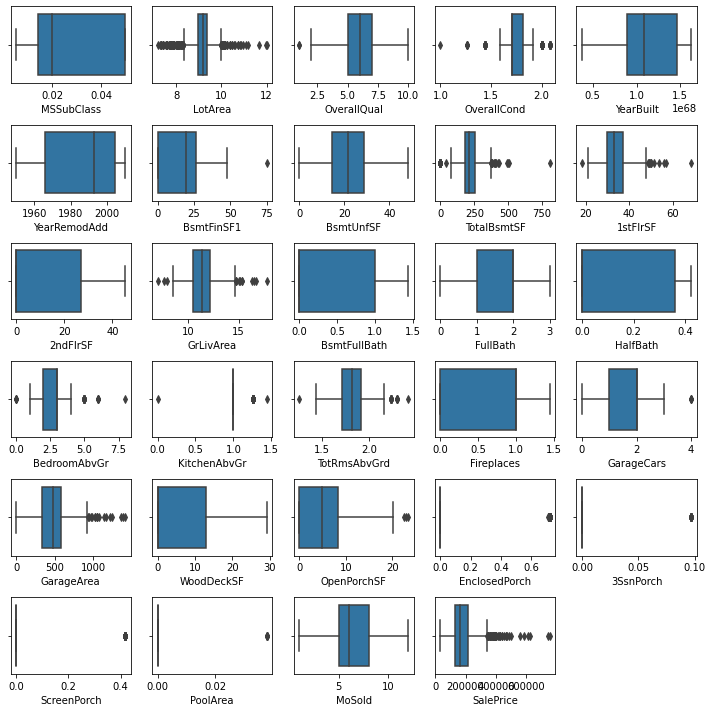

In [25]:
#Checking for outliers
plt.figure(figsize=(10,10))
for i in range(0, len(significantCols)):
    plt.subplot(6,5,i+1)
    sns.boxplot(housingDf[significantCols[i]])
    plt.tight_layout()

In [26]:
#Making a function to detect outliers using the IQR method and then replacing them with the upper and lower bridge values
def outlierRemoverS(col, data = housingDf):
    '''Note: This function is for skewed data only'''
    IQR = data[col].quantile(0.75) - data[col].quantile(0.25)
    lowerBridge = data[col].quantile(0.25) - (1.5*IQR)
    upperBridge = data[col].quantile(0.75) + (1.5*IQR)
    if lowerBridge >=0:
            data.loc[data[col]>=upperBridge, col] = upperBridge
            data.loc[data[col]<=lowerBridge, col] = lowerBridge
    elif lowerBridge < 0:
            data.loc[data[col]>=upperBridge, col] = upperBridge
            data.loc[data[col]<=0, col] = data[col].quantile(0.5)

In [27]:
#Applying the above functions of columns with outliers
outlierCols = ['LotArea', 'OverallQual', 'OverallCond', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea']
for i in outlierCols:
    outlierRemoverS(i)

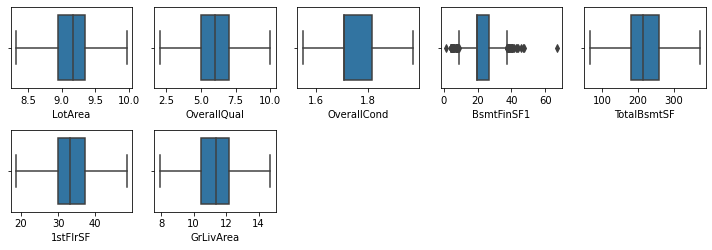

In [28]:
#Columns after outlier removal
plt.figure(figsize=(10,10))
for i in range(0, len(outlierCols)):
    plt.subplot(6,5,i+1)
    sns.boxplot(housingDf[outlierCols[i]])
    plt.tight_layout()

In [29]:
#Checking categorical column labels
for cols in categoricalCols:
    print(f'{cols}\n{housingDf[cols].value_counts()}\n-----------------------')

MSZoning
RL         928
RM         163
FV          52
RH          16
C (all)      9
Name: MSZoning, dtype: int64
-----------------------
Street
Pave    1164
Grvl       4
Name: Street, dtype: int64
-----------------------
LotShape
Reg    740
IR1    390
IR2     32
IR3      6
Name: LotShape, dtype: int64
-----------------------
LandContour
Lvl    1046
Bnk      50
HLS      42
Low      30
Name: LandContour, dtype: int64
-----------------------
Utilities
AllPub    1168
Name: Utilities, dtype: int64
-----------------------
LotConfig
Inside     842
Corner     222
CulDSac     69
FR2         33
FR3          2
Name: LotConfig, dtype: int64
-----------------------
LandSlope
Gtl    1105
Mod      51
Sev      12
Name: LandSlope, dtype: int64
-----------------------
Neighborhood
NAmes      182
CollgCr    118
OldTown     86
Edwards     83
Somerst     68
Gilbert     64
NridgHt     61
Sawyer      60
NWAmes      59
SawyerW     51
BrkSide     50
Crawfor     45
NoRidge     35
Mitchel     34
IDOTRR      30
C

In [30]:
#housingDf = pd.get_dummies(housingDf, columns=categoricalCols, drop_first=True)

In [31]:
significantCols.pop() #removes the target column 'SalePrice'
#Seperating the dependent and independant features
x = housingDf[significantCols].copy()
y = housingDf['SalePrice']

In [32]:
#Applying Standard scaler to x
scaler = StandardScaler()
x = scaler.fit_transform(x)
x = pd.DataFrame(x, columns=housingDf[significantCols].columns)

In [33]:
#Performing train-test split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

In [34]:
#Fitting various regression models to the train data and printing their perfomance metrics one-by-one
lr = LinearRegression()
rfr = RandomForestRegressor()
dtr = DecisionTreeRegressor()
svr = SVR()
knr = KNeighborsRegressor()
mlp = MLPRegressor()

models = [lr, rfr, dtr, svr, knr, mlp]

for model in models:
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    predTrain = model.predict(x_train)
    print(f'{model}\n\tAccuracy: {model.score(x_test, y_test)}\n\tMSE: {mean_squared_error(y_test, pred)}\n\tRMSE: {mean_squared_error(y_test, pred)**(1/2)}\n\tR2 Score: {r2_score(y_test, pred)}\n\tTrain-Test difference: {r2_score(y_train, predTrain)-r2_score(y_test, pred)}')

LinearRegression()
	Accuracy: 0.7713151755838868
	MSE: 1526358451.6307666
	RMSE: 39068.6376986806
	R2 Score: 0.7713151755838868
	Train-Test difference: 0.04639578059305127
RandomForestRegressor()
	Accuracy: 0.8318527950387349
	MSE: 1122299689.3913436
	RMSE: 33500.74162449756
	R2 Score: 0.8318527950387349
	Train-Test difference: 0.14589729763955617
DecisionTreeRegressor()
	Accuracy: 0.6595533017064319
	MSE: 2272313856.404558
	RMSE: 47668.793318108634
	R2 Score: 0.6595533017064319
	Train-Test difference: 0.3404466982935681
SVR()
	Accuracy: -0.06588159280467965
	MSE: 7114234107.002918
	RMSE: 84345.91932632496
	R2 Score: -0.06588159280467965
	Train-Test difference: 0.016114250650999473
KNeighborsRegressor()
	Accuracy: 0.7241039710788493
	MSE: 1841469964.5696864
	RMSE: 42912.352121151394
	R2 Score: 0.7241039710788493
	Train-Test difference: 0.1561581458977006
MLPRegressor()
	Accuracy: -4.999725853769918
	MSE: 40045211953.83735
	RMSE: 200112.99796324412
	R2 Score: -4.999725853769918
	Train-T

Judging by the scores above, RandomForestRegressor seems perform the best as:
1. It has the highest Accuracy score.
2. It has the lowest RSME as compared to the other algorithms.
3. The tran-test scores are not too high which indicates there is no overfitting.

In [35]:
#Re-taining on the entire data for final prediction
rfr = RandomForestRegressor()
rfr.fit(x, y)

RandomForestRegressor()

In [36]:
#importing test set
housingTestDf = pd.read_csv('test.csv')
housingTestDf = housingTestDf[significantCols].copy()
housingTestDf.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold
0,20,14157,9,5,2005,2006,1249,673,1922,1922,0,1922,1,2,0,3,1,8,1,3,676,178,51,0,0,0,0,7
1,120,5814,8,5,1984,1984,1036,184,1220,1360,0,1360,1,1,0,1,1,4,1,2,565,63,0,0,0,0,0,8
2,20,11838,8,5,2001,2001,0,1753,1753,1788,0,1788,0,2,0,3,1,7,1,2,522,202,151,0,0,0,0,6
3,70,12000,7,7,1941,1950,275,429,704,860,704,1564,0,1,1,3,1,7,1,1,234,0,0,0,0,0,0,7
4,60,14598,6,5,2007,2007,0,894,894,894,1039,1933,0,2,1,4,1,9,1,3,668,100,18,0,0,0,0,1


In [37]:
housingTestDf.isnull().sum()

MSSubClass       0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
BsmtFinSF1       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
GrLivArea        0
BsmtFullBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MoSold           0
dtype: int64

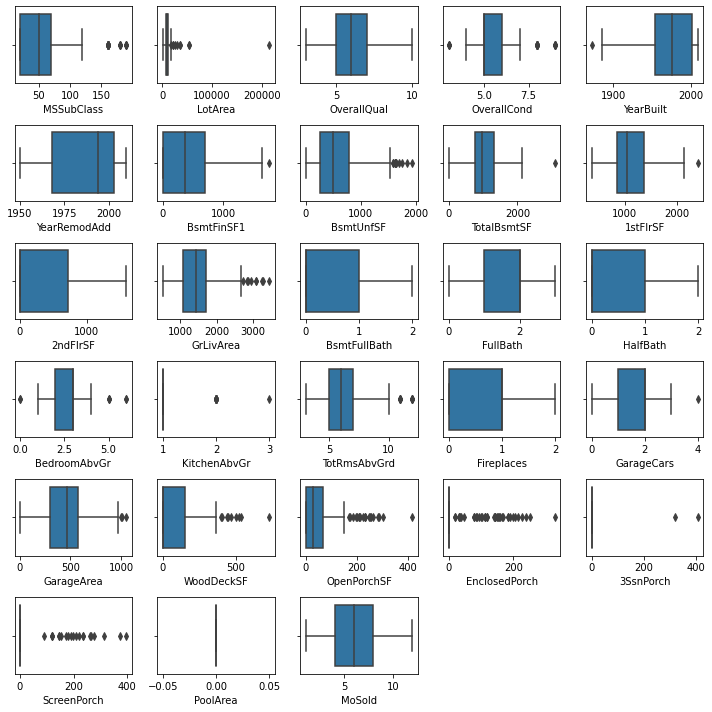

In [38]:
#Checking for outliers
plt.figure(figsize=(10,10))
for i in range(0, len(significantCols)):
    plt.subplot(6,5,i+1)
    sns.boxplot(housingTestDf[significantCols[i]])
    plt.tight_layout()

In [39]:
#Applying the outlier removal functions of columns with outliers
outlierCols = ['MSSubClass','LotArea', 'OverallQual', 'OverallCond', 'BsmtFinSF1','BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea']
for i in outlierCols:
    outlierRemoverS(i, data=housingTestDf)

In [40]:
housingTestDf = scaler.fit_transform(housingTestDf)
housingTestDf = pd.DataFrame(housingTestDf, columns=significantCols)

In [41]:
pred = rfr.predict(housingTestDf)
pred

array([365446.92, 248446.  , 238443.19, 165688.45, 198823.46,  84809.22,
       133209.16, 321880.5 , 237330.53, 165281.65,  74529.54, 147020.46,
       120658.22, 193653.11, 322455.98, 120846.26, 116216.43, 125677.41,
       172091.4 , 203919.75, 163042.39, 141804.41, 156739.59,  93421.87,
       105760.76, 130094.6 , 177019.62, 146724.  , 162952.02, 101279.97,
       166228.84, 184693.6 , 217392.63, 159948.  , 120244.01, 174304.91,
       188775.5 , 118012.58, 156819.16, 160016.31, 109668.43, 338060.24,
       195922.57, 182841.09, 129381.33, 127791.84, 123834.26, 111487.72,
       208670.3 , 342526.2 , 142692.37, 189224.78, 108929.28,  99176.  ,
       285483.04, 115444.71, 143602.84, 181469.74, 117572.71, 234422.74,
        92702.97, 170544.73, 130757.59, 142321.6 , 195447.92,  82663.26,
       155653.24, 196331.26, 138906.  , 166248.07, 315508.35, 151998.  ,
       180082.15, 143685.67, 149961.67, 264397.1 , 328183.34, 192491.44,
       305996.32, 148277.62, 193684.3 , 149148.43, 

In [49]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(rfr, random_state=1).fit(x, y)
eli5.show_weights(perm, feature_names = x.columns.tolist())

Weight,Feature
0.5622 ± 0.0411,OverallQual
0.1467 ± 0.0106,GrLivArea
0.0375 ± 0.0036,TotalBsmtSF
0.0365 ± 0.0047,BsmtFinSF1
0.0321 ± 0.0040,2ndFlrSF
0.0230 ± 0.0028,1stFlrSF
0.0209 ± 0.0032,GarageArea
0.0150 ± 0.0018,YearRemodAdd
0.0146 ± 0.0031,GarageCars
0.0140 ± 0.0014,YearBuilt
